# Lab Exercise 03: Exploring Wavenumbers and Spatial Sampling in Temperature Measurements

## Objective:
In this exercise, you will simulate measuring temperature across a field and explore how the spacing between sensors affects your ability to detect spatial features. You will calculate the fundamental wavenumber and Nyquist wavenumber and observe how changing the sensor spacing impacts your measurements.

**Answer** this notebook by updating the **Answers for Part. x** cell by **double clicking and typing your answers in a cell**. After finishing this notebook, upload in your github repository (**meteo203-2425-lastname/exercises/exercise_03_wavenumbers.ipynb**)

---
## Part 1: Simulating Temperature Across a Field

Task: Simulate a temperature field that varies across a 100-meter-wide field. Assume that the temperature varies in a sinusoidal manner across the field.

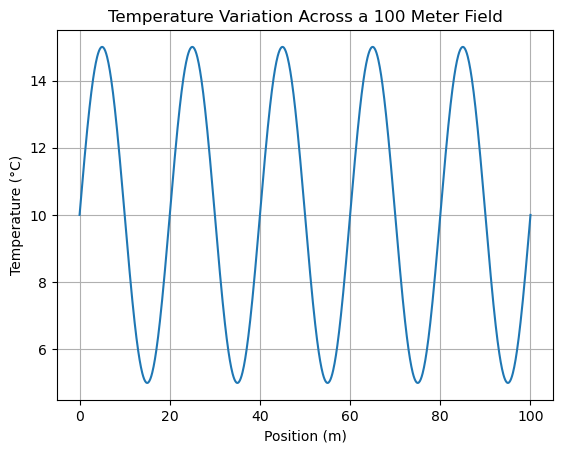

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the length of the field
L = 100 # in meters

# Define the wavelength of the temperature wave (e.g., temperature changes every 20 meters)
wavelength = 20  # meters
k = 2 * np.pi / wavelength  # wavenumber

# Generate positions across the field (fine resolution)
x_fine = np.linspace(0, L, 1000)  # 1000 points across the field

# Generate the temperature variation across the field
temperature = 10 + 5 * np.sin(k * x_fine)  # Sinusoidal temperature wave

# Plot the temperature variation
plt.plot(x_fine, temperature)
plt.title(f"Temperature Variation Across a {L} Meter Field")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


### Questions:

What does the wavelength represent in this context? How often does the temperature change across the field?

**Wavelength describes the temperature across a 100 m field. It has a sinusoidal pattern - exhibiting the same pattern that repeats every 20 meters.**

---
## Part 2: Exploring Sensor Spacing

Now, we’ll simulate measuring the temperature using sensors placed at regular intervals across the field.

Task: Change the sensor spacing and observe how well you can capture the temperature wave.

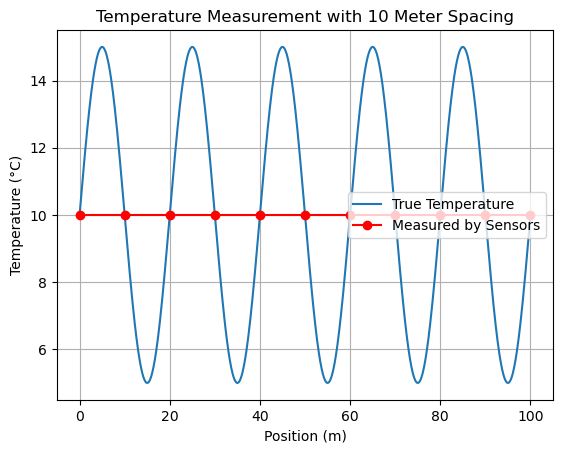

In [3]:
# Define the sensor spacing (e.g., 5 meters)
sensor_spacing = 10  # meters

# Generate positions where the sensors are placed
x_sensors = np.arange(0, L + sensor_spacing, sensor_spacing)  # Sensor positions

# Measure the temperature at the sensor positions
temperature_sensors = 10 + 5 * np.sin(k * x_sensors)

# Plot the temperature measured by the sensors
plt.plot(x_fine, temperature, label="True Temperature")
plt.plot(x_sensors, temperature_sensors, 'o-', label="Measured by Sensors", color='r')
plt.title(f"Temperature Measurement with {sensor_spacing} Meter Spacing")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

### Questions:

1. How well does the sensor-based measurement (red line) match the true temperature variation? <br>
**The sensor-based measurement is able to capture the cycle/pattern of the temperature variation, although it isn't 1-to-1.**<br>
2. What would happen if the spacing between the sensors was larger? Change the sensor spacing to 10 meters and re-run the code. <br>
**When the sensors are placed farther, the spatial variation of temperature is not captured at all.**

---
## Part 3: Calculating Fundamental and Nyquist Wavenumbers

Task: Calculate the fundamental wavenumber and Nyquist wavenumber for the given scenario.

- The fundamental wavenumber represents the longest wave (or temperature trend) that spans the entire field.
- The Nyquist wavenumber represents the shortest wave that can be detected by your sensors.

In [44]:
# Calculate the fundamental wavenumber
L = 100  # Length of the field in meters
k_0 = 2 * np.pi / L  # Fundamental wavenumber

# Calculate the Nyquist wavenumber based on sensor spacing
sensor_spacing = 10
k_n = np.pi / sensor_spacing  # Nyquist wavenumber

# Print the results
print(f"Fundamental Wavenumber: {k_0:.3f} radians/m")
print(f"Nyquist Wavenumber (with {sensor_spacing}m spacing): {k_n:.3f} radians/m")

Fundamental Wavenumber: 0.063 radians/m
Nyquist Wavenumber (with 10m spacing): 0.314 radians/m


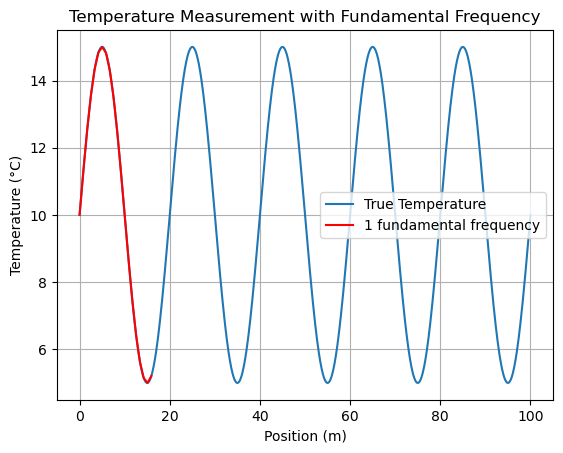

In [50]:
sensor_spacing = 1 / k_0

# Generate positions where the sensors are placed
x_sensors = np.linspace(0, sensor_spacing, 20)  # Sensor positions

# Measure the temperature at the sensor positions
temperature_sensors = 10 + 5 * np.sin(k * x_sensors)

# Plot the temperature measured by the sensors
plt.plot(x_fine, temperature, label="True Temperature")
plt.plot(x_sensors, temperature_sensors, '-', label="1 fundamental frequency", color='r', markersize=3)
plt.title(f"Temperature Measurement with Fundamental Frequency")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

### Questions:

1. What is the fundamental wavenumber? What does this tell you about the largest feature (or longest wave) you can detect in the field? <br>
**The fundamental wavenumber shows us the minimum length that all features of the wave will be exhibited.** <br> <br>
2. What is the Nyquist wavenumber for 5-meter spacing? What about for 10-meter spacing? How does increasing the sensor spacing affect your ability to detect smaller features? <br>
**The Nyquist wavenumber for 5-meter and 10-meter spacing is 0.628 radians/m and 0.314 radians/m respectively. This means that with sensors with nearer spacing (or higher frequency), the Nyquist wavenumber is higher. This means that per meter, more of the wave properties is detected.**

---
### Part 4: Aliasing and Sampling Resolution

When the sensor spacing becomes too large (i.e. sensors are further apart), we may not be able to detect certain temperature variations correctly due to aliasing. Let's explore this concept.

Task: Increase the sensor spacing to 15 meters and observe the effect.

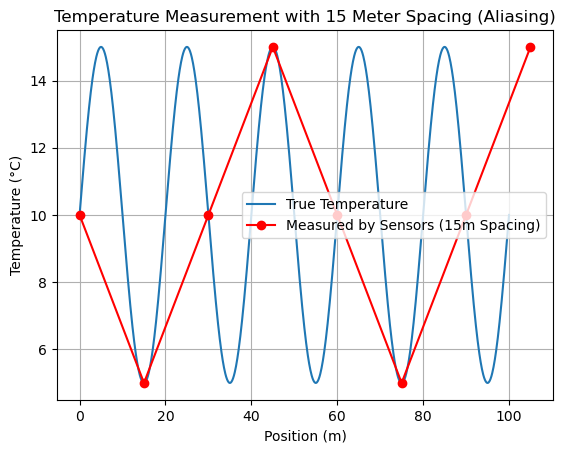

In [49]:
# Increase the sensor spacing to 15 meters
sensor_spacing =   15
x_sensors = np.arange(0, L + sensor_spacing, sensor_spacing)
temperature_sensors = 10 + 5 * np.sin(k * x_sensors)

# Plot the result
plt.plot(x_fine, temperature, label="True Temperature")
plt.plot(x_sensors, temperature_sensors, 'o-', label="Measured by Sensors (15m Spacing)", color='r')
plt.title("Temperature Measurement with 15 Meter Spacing (Aliasing)")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

### Questions:

1. What happens to the accuracy of your temperature measurements when the sensor spacing is increased to 15 meters? <br>
**When the sensor spacing is increased to 15 meters, temperature measurements show a completely different trend, with temperature changing every 15 meters**<br><br>
2. Explain aliasing in this context. Why does it occur when the sensor spacing exceeds a certain limit? <br>
****

### Final Questions

1. How does sensor spacing affect your ability to resolve both large-scale and small-scale temperature changes across the field?
2. How do the fundamental wavenumber and Nyquist wavenumber help you determine the types of temperature variations you can detect?
3. Why is it important to consider both the spatial resolution (sensor spacing) and the wavenumbers when designing a measurement system for temperature or other physical parameters?